In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [8]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001577,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [9]:
df.drop('Loan_ID', axis=1, inplace=True)

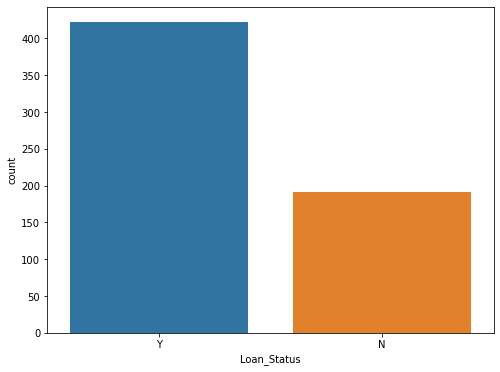

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])

In [11]:
len(df.columns)


12

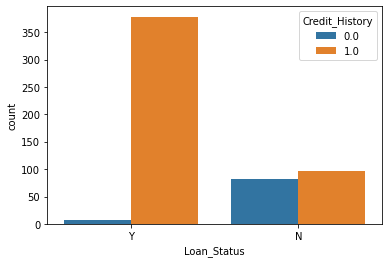

In [12]:
sns.countplot(x="Loan_Status", hue="Credit_History", data=df)


##### we didn't give a loan for most people who got Credit History = 0
##### but we did give a loan for most of people who got Credit History = 1
##### so we can say if you got Credit History = 1 , you will have better chance to get a loan

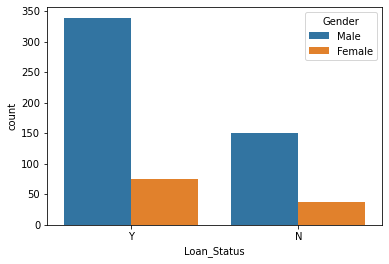

In [13]:
sns.countplot(x="Loan_Status", hue="Gender", data=df)
# most males got loan and most females got one too so (No pattern)
# i think it's not so important feature

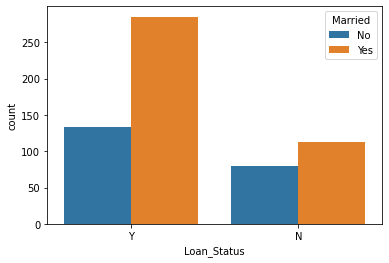

In [14]:
sns.countplot(x="Loan_Status", hue="Married", data=df)
# most people who get married did get a loan

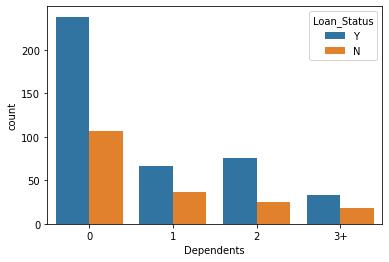

In [15]:
sns.countplot(x="Dependents", hue="Loan_Status", data=df)
# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))

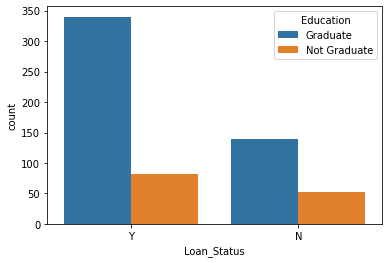

In [16]:
sns.countplot(x="Loan_Status", hue="Education", data=df)
# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)

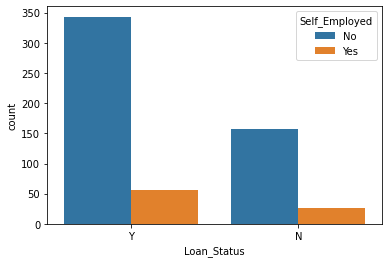

In [17]:
sns.countplot(x="Loan_Status", hue="Self_Employed", data=df)
# No pattern

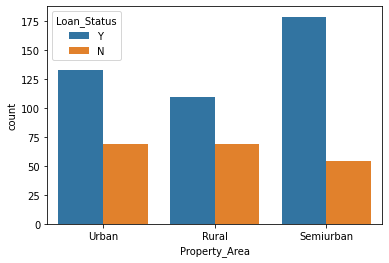

In [18]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);
# We can say, Semiurban Property_Area got more than 50% chance to get a loan

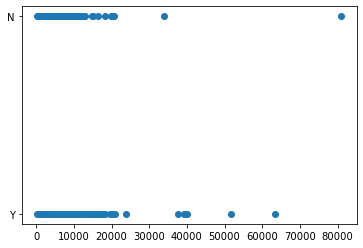

In [19]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status']);
# No pattern

In [20]:
# the numerical data
df.groupby('Loan_Status').median() # median because Not affected with outliers
# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N
# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [21]:
#Missing values
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [22]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [23]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [24]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [25]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [26]:
# fill every column with its own most frequent value(mode)
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [27]:
# fill every missing value with their previous value in the same column
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data 

False

In [28]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [29]:
# transform the target column
target_values = {'Y': 0 , 'N' : 1}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_values)

In [30]:
# transform other columns
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [31]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [32]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [34]:
X = pd.concat([cat_data, num_data], axis=1)
y = target

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [38]:
def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression

LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809
------------------------------


In [39]:
X_train.shape

(491, 11)

In [40]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_wa

 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    6.752695
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: Data

 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `ze

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [41]:
x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,6.907771,0.800000
1,0.833333,0.333333,0.476190,7.753619,0.775510
2,0.875000,0.466667,0.608696,6.343873,0.816327
3,0.500000,0.200000,0.285714,10.573144,0.693878
4,1.000000,0.466667,0.636364,5.638984,0.836735
5,0.857143,0.400000,0.545455,7.048746,0.795918
6,1.000000,0.733333,0.846154,2.819492,0.918367
7,1.000000,0.625000,0.769231,4.229238,0.877551
8,1.000000,0.250000,0.400000,8.458476,0.755102
9,1.000000,0.312500,0.476190,7.753603,0.775510


In [42]:
#Let's start to improve our model

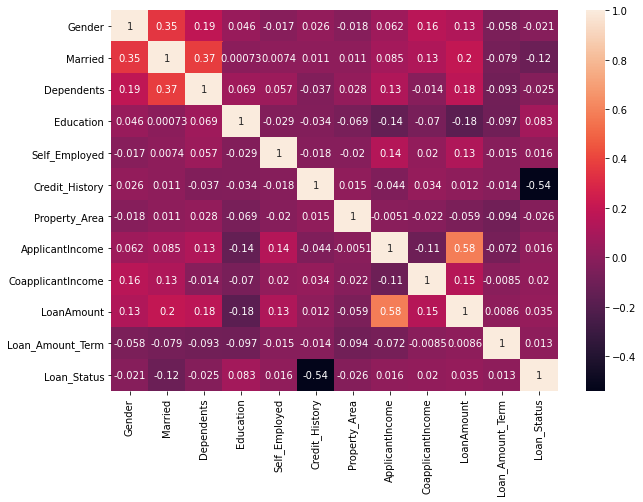

In [43]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# here we got 58% similarity between LoanAmount & ApplicantIncome 
# and that may be bad for our model 

In [44]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [45]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


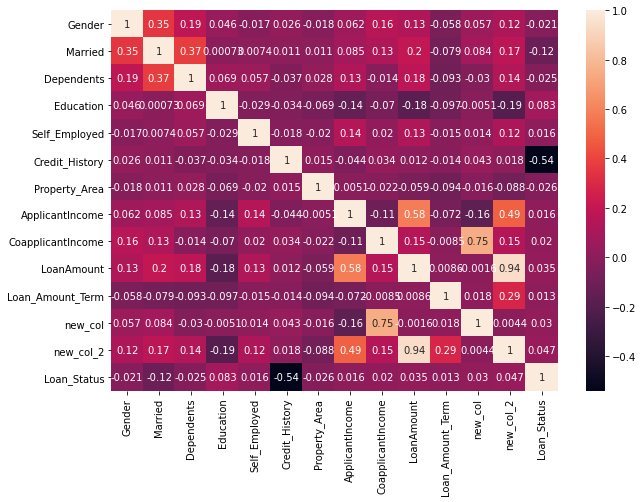

In [46]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);
# new_col 0.03 , new_col_2, 0.047
# not that much , but that will help us reduce the number of features

In [47]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

C:\Users\BROTHERS\Anaconda4\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
train_eval_cross(models, X_train, y_train, skf)
# ok, SVC is improving, but LogisticRegression is overfitting
# i wan't change nothing so we can see what will happen as we go

C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `ze

LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was e

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: Data

 pre      0.333095
 rec      0.175417
 f1       0.227944
 loss    12.810451
 acc      0.629102
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `ze

 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [49]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts())

1    398
0     93
Name: Gender, dtype: int64
1    315
0    176
Name: Married, dtype: int64
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
0    382
1    109
Name: Education, dtype: int64
0    428
1     63
Name: Self_Employed, dtype: int64
1    421
0     70
Name: Credit_History, dtype: int64
1    179
2    170
0    142
Name: Property_Area, dtype: int64
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: new_col, Length: 270, dtype: int64
43200.0    18
39600.0    13
36000.0    11
57600.0    11
46080.0     9
           ..
3000.0      1
12000.0     1
9072.0      1
25920.0     1
7560.0      1
Name: new_col_2, Length: 211, dtype: int64


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


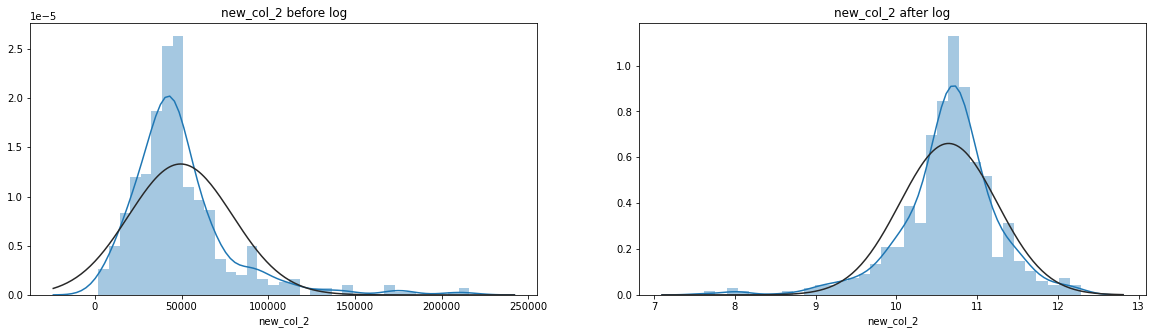

In [50]:
# new_col_2
# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model
from scipy.stats import norm
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')
X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values
sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [51]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.611718
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklear

 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    8.860292
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    7.811411
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [52]:
# most of our data is 0 , so we will try to change other values to 1
print('before:')
print(X_train['new_col'].value_counts())
X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

after:
1.0    269
0.0    222
Name: new_col, dtype: int64


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
train_eval_cross(models, X_train, y_train, skf)
# ok model is improving

LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

 pre     0.910714
 rec     0.422500
 f1      0.562606
 loss    6.682206
 acc     0.806531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73

 pre     0.719762
 rec     0.298333
 f1      0.406231
 loss    9.074569
 acc     0.737265
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

 pre     0.819048
 rec     0.324167
 f1      0.458747
 loss    7.669026
 acc     0.777959
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [54]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts())

1    398
0     93
Name: Gender, dtype: int64
1    315
0    176
Name: Married, dtype: int64
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
0    382
1    109
Name: Education, dtype: int64
0    428
1     63
Name: Self_Employed, dtype: int64
1    421
0     70
Name: Credit_History, dtype: int64
1    179
2    170
0    142
Name: Property_Area, dtype: int64
1.0    269
0.0    222
Name: new_col, dtype: int64
10.673596    18
10.586584    13
10.491274    11
10.961278    11
10.738134     9
             ..
10.085809     1
9.736252      1
11.542096     1
11.616204     1
8.626944      1
Name: new_col_2, Length: 211, dtype: int64


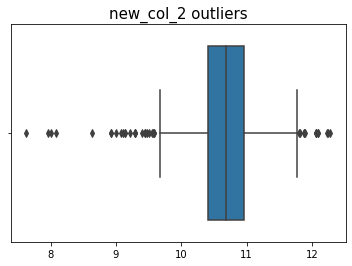

In [55]:
# Outliers
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [56]:
threshold = 0.1
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before after the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.05452697463980077
Lower: 10.361481125646174
Upper: 11.015804821323783
Nubers of Outliers: 218
outliers:[9.980448593672257, 10.31692083029347, 10.09823162932864, 11.056588026488308, 11.502875129116727, 12.092679958175083, 11.427367576608582, 11.62589694362939, 10.083305979111964, 11.473352689850405, 11.184421397998193, 9.692766521220475, 10.14878390849147, 10.190169124654325, 10.268130666124037, 10.268130666124037, 10.31692083029347, 8.930626469173578, 11.184421397998193, 10.16277015046621, 10.268130666124037, 11.153962190513484, 9.878169744551839, 7.620705086838262, 11.117212648304742, 11.39143556738252, 11.589886506106357, 11.502875129116727, 11.237962164926222, 10.044987114809828, 9.946547041996576, 9.980448593672257, 9.963641475355875, 11.117212648304742, 11.427367576608582, 11.654425027243928, 11.375041757606843, 11.383272256743357, 12.254862809699606, 11.629107219259637, 7.96554557

In [57]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

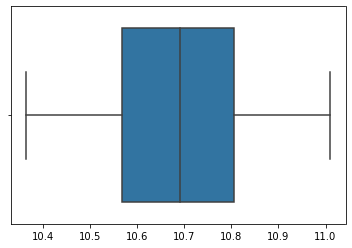

In [59]:
sns.boxplot(X_train['new_col_2']);
plt.xlabel('');
# Without outliers

In [60]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: Data

 pre     0.856667
 rec     0.464286
 f1      0.567726
 loss    5.811309
 acc     0.831746
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was e

 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.981909
 acc     0.739947
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------


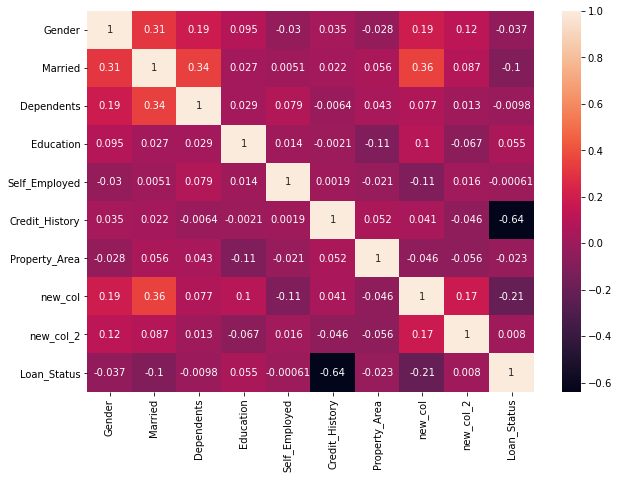

In [61]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

In [62]:
X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\BROTHERS\Anaconda4\lib\site-packages\ipykernel_launcher.py:14: Data

 pre     0.864762
 rec     0.466071
 f1      0.568841
 loss    5.806741
 acc     0.831878
Name: 0, dtype: float64
------------------------------
SVC :


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `ze

 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    8.981909
 acc     0.739947
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------


In [63]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [64]:
X_test_new = X_test.copy()


In [65]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]
X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

In [66]:
X_test_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
182,1,1,0,0,1,1,0.0,9.483416
440,1,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,1,1,1.0,11.218823
533,1,0,1,0,1,1,0.0,11.164219
504,1,1,0,1,1,1,1.0,10.524064


In [67]:
X_train.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
26,1,1,0,0,1,1,1.0,10.690125
394,1,1,2,0,1,2,1.0,10.613492
584,1,1,1,0,0,0,1.0,10.869711
86,1,1,2,1,1,1,1.0,10.481224
416,0,0,1,0,1,2,0.0,10.961278


In [68]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))

LogisticRegression:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
KNeighborsClassifier:
  pre: 0.647
  rec: 0.289
  f1: 0.400
  loss: 9.267
  acc: 0.732
SVC:
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.671
  acc: 0.691
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813


C:\Users\BROTHERS\Anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### what ever I do, recall score is not improving , maybe because we don't have a good amount of data